## INTRODUCTION:

This dataset was taken from kaggle and it has around 14 features and 5700 data points. This data provides us with a case to find whether they are targeting some particular race,region.
# Fatal Police Shootings in the US - Racial bias
*So far, 2020 has been a year marred by a slew of negative events. From Kobe Bryant's tragic death to the COVID-19 pandemic, this year was already shaping up to be a dumpster fire. But  There's more like  George Floyd who was assassinated in cold blood by Minneapolis police officers just as everybody felt 2020 couldn't get any worse. This incident sparked national uproar and became the most explosive  in US politics today, based on police brutality, institutional racism, and the role of government in inflicting change.
### I want to emphasize in this notebook that this is a very delicate and complex topic. When analyzing data and asking questions, preconceived ideas must be put to the side.

This notebook is structured as follows:

   Setup and Data
   
   Data visualization
   
   Build the Machine learning Model
   
   Results & Conclusion

# PREPROCESSING THE DATA

Importing the pacakages

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from datetime import datetime

# Reading the dataset from csv file

In [28]:
df=pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [29]:
df.describe()

,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000


In [30]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

<AxesSubplot:xlabel='gender', ylabel='shots'>

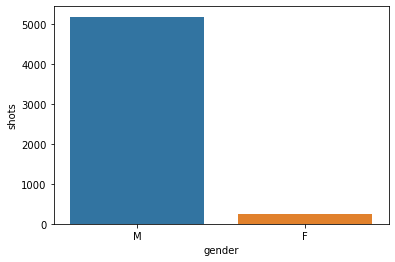

In [12]:
# bias against male.
df_gender = df['gender'].value_counts()
gender_shots = df_gender.to_frame()
gender_shots.reset_index(level=0, inplace=True)
gender_shots.columns=['gender','shots']
gender_shots.head()
sns.barplot(x='gender', y='shots', data=gender_shots)

<AxesSubplot:xlabel='Race', ylabel='shots'>

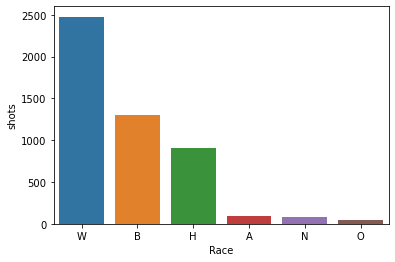

In [13]:
#Number of people killed as a proportion of respective race
df_race = df['race'].value_counts()
race_shots = df_race.to_frame()
race_shots.reset_index(level=0, inplace=True)
race_shots.columns=['Race','shots']
race_shots.head()
sns.barplot(x='Race', y='shots', data=race_shots)

Text(0.5, 1.0, 'Total number of people killed, by race')

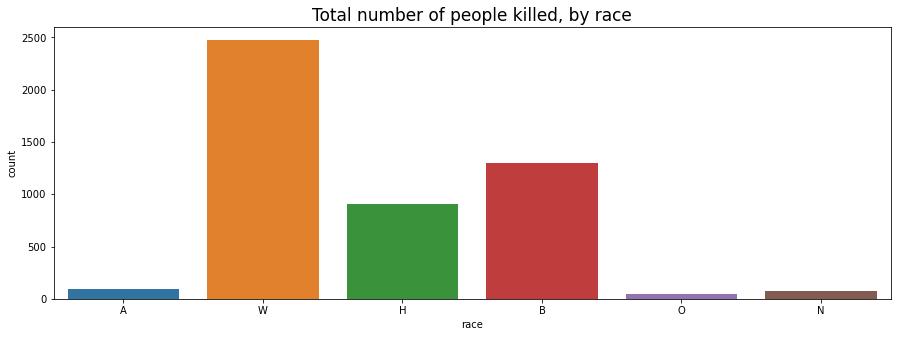

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="race")

plt.title("Total number of people killed, by race", fontsize=17)

In [19]:
# List of nr of people killed per race

races = ["A", "W", "H", "B", "N", "O"]
killed_per_race = []

for i in races:
    i_killings = df.race.loc[(df.race==i)].count()
    killed_per_race.append(i_killings)
    
print (killed_per_race)

[93, 2476, 902, 1298, 78, 48]


In [21]:
prop_killed_per_race = []

for i in races:
    
    if i == "A":
        prop_i_killed = killed_per_race[0]/14674252.0
        print (prop_i_killed)
    elif i == "W":
        prop_i_killed = killed_per_race[1]/223553265.0
        print (prop_i_killed)
    elif i == "H":
        prop_i_killed = killed_per_race[2]/50477594.0
        print (prop_i_killed)
    elif i == "B":
        prop_i_killed = killed_per_race[3]/38929319.0
        print (prop_i_killed)
    elif i == "N":
        prop_i_killed = killed_per_race[4]/2932248.0
        print (prop_i_killed)
    else:
        prop_i_killed = killed_per_race[5]/22579629.0
        print (prop_i_killed)
    
    prop_killed_per_race.append(prop_i_killed)

6.337631383187368e-06
1.107566020116056e-05
1.786931445266587e-05
3.3342478968101136e-05
2.660075136891559e-05
2.125809950198916e-06


<AxesSubplot:title={'center':'People killed as a proportion of their respective race'}>

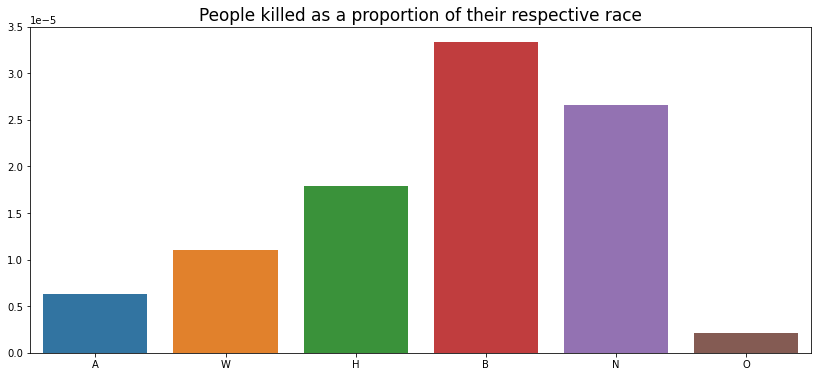

In [22]:
plt.figure(figsize=(14,6))
plt.title("People killed as a proportion of their respective race", fontsize=17)
sns.barplot(x=races, y=prop_killed_per_race)

95.60398965644625% of the victims are male.


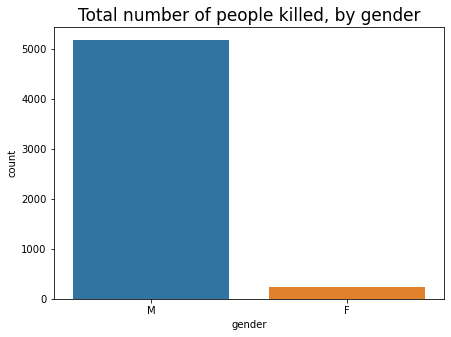

In [24]:
female = df[df["gender"] == "F"].gender.count()
male = df[df["gender"] == "M"].gender.count()
perc_male = (male*100)/(male+female) 

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="gender")

plt.title("Total number of people killed, by gender", fontsize=17)

print (str(perc_male) + "% " + "of the victims are male.")

## Conclusion: